In [1]:
from parameters import parameters
import numpy as np
import pandas as pd
import Utils
#
# LOOK HERE! 
# This cell must run first to setup the working environment
#

#load the config file
Utils.load_config('config.json')
Utils.print_parameters()

Below are the parameters in use. Check the parameters carefully to ensure a sucussful run.
{ 'agegrid_url': 'https://www.earthbyte.org/webdav/ftp/Data_Collections/Muller_etal_2016_AREPS/Muller_etal_2016_AREPS_Agegrids/Muller_etal_2016_AREPS_Agegrids_v1.17/Muller_etal_2016_AREPS_v1.17_netCDF/Muller_etal_2016_AREPS_v1.17_AgeGrid-{}.nc',
  'anchor_plate_id': 0,
  'case_name': 'case_AREPS',
  'coastlines': '../data/Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz',
  'convergence_data_dir': './convergence_data/AREPS/',
  'convergence_data_filename_ext': 'csv',
  'convergence_data_filename_prefix': 'subStats',
  'coreg_input_dir': './coreg_input/AREPS/',
  'coreg_input_files': [ 'deposit_candidates.csv',
                         'negative_deposits.csv',
                         'positive_deposits.csv'],
  'coreg_output_dir': 'coreg_output',
  'feature_names': [ 'conv_rate',
                     'dist_nearest_edge',
                     'subduction_volume_km3y',
                     'car

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import pandas as pd
from parameters import parameters 
import Utils as Utils

names = ["SVC-RBF-C=100",
         "GaussianProcess-2",
         "AdaBoost-100"]

classifiers = [
    SVC(kernel='rbf', gamma=2, C=100, probability=True),
    GaussianProcessClassifier(2.0 * RBF(1.0)),
    AdaBoostClassifier(n_estimators=100)]

SA_positive = pd.read_csv(Utils.get_ml_input_dir() + 'SA_positive_deposits.csv')
SA_negative = pd.read_csv(Utils.get_ml_input_dir() + 'SA_negative_deposits.csv')

SA_train_test_data = pd.concat([SA_positive, SA_negative])

SA_labels = SA_train_test_data.iloc[:,-1]
SA_data = SA_train_test_data.iloc[:,:-1]

SA_data = preprocessing.scale(SA_data)

In [3]:
rs = ShuffleSplit(n_splits=10, test_size=.1, random_state=None)
#rs = KFold(n_splits=10, shuffle=True, random_state=1)

SA_all_scores_cv = []
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, SA_data, SA_labels, cv=rs)
#    score_list = scores.tolist()
#    SA_all_scores_cv.append(name)
#    SA_all_scores_cv.append(score_list)
    print(name)
    print(f"Score Mean: {round(np.mean(scores), 2)}, Score Standard Deviation: {round(np.std(scores),4)}")
    print(' ')
        
#np.savetxt('case_AREPS/ml_output/SA_cv_scores_ShuffleSplit_5.csv', SA_all_scores_cv, fmt='%s\n', delimiter=",")
print('done!')

SVC-RBF-C=100
Score Mean: 0.97, Score Standard Deviation: 0.0417
 
GaussianProcess-2
Score Mean: 0.99, Score Standard Deviation: 0.0208
 
AdaBoost-100
Score Mean: 0.97, Score Standard Deviation: 0.0457
 
done!


In [4]:
clf = SVC(kernel='rbf', gamma=2, C=100, probability=True)
#clf = GaussianProcessClassifier(2.0 * RBF(1.0))
#clf = AdaBoostClassifier(n_estimators=100)

SA_train_data, SA_test_data, SA_train_labels, SA_test_labels = \
train_test_split(SA_data, SA_labels, test_size=0.2, random_state=None)


In [5]:
# clf.fit(SA_train_data, SA_train_labels)
# score=clf.score(SA_test_data, SA_test_labels)
# proba=clf.predict_proba(SA_test_data)
# predict_labels=clf.predict(SA_test_data)

# print(clf.feature_importances_)
# #plot the feature importance if using Random Forest Classifier. 
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
# ax.set_xlabel('Importance', fontsize=18)
# ax.set_title('Feature Importance - South America',fontsize=18)
# ax.set_yticks(np.arange(len(clf.feature_importances_)))
# #feature_names = ['Seafloor Age', 'Distance Along Trench', 'Trench Absolute Orthogonal',
# #                'Convergence Orthogonal Velocity', 'Convergence Parallel Velocity']
# feature_names = SA_train_test_data.columns[:-1]
# #print(feature_names)
# ax.set_yticklabels(feature_names, rotation=0, fontsize=18)
# ax.invert_yaxis() 
# plt.show()

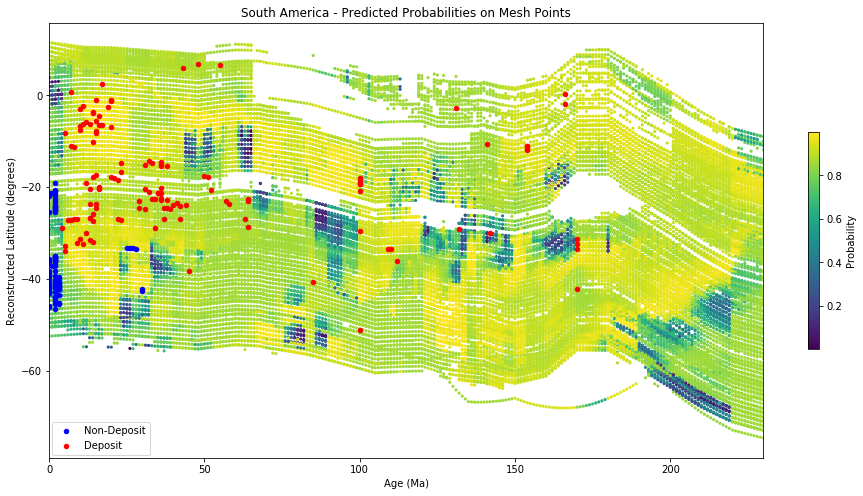

In [6]:
#train the ML model - South America
clf.fit(SA_data, SA_labels)

#read in test data and predict
import pandas as pd
import re
import numpy as np

SA_candidates= pd.read_csv(Utils.get_ml_input_dir() + 'SA_deposit_candidates.csv')
SA_all_candidates_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/deposit_candidates.csv')
SA_all_positive_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/positive_deposits.csv')
SA_all_negative_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/negative_deposits_cleaned.csv')

feature_names = Utils.get_parameter('feature_names')

SA_positive_idx = SA_all_positive_data[feature_names].dropna().index
SA_negative_idx = SA_all_negative_data[feature_names].dropna().index
SA_candidates_idx = SA_all_candidates_data[feature_names].dropna().index

#display(candidates)
#print(all_candidates_data.iloc[positive.index])
SA_test_data = preprocessing.scale(SA_candidates)
SA_mesh_prob=clf.predict_proba(SA_test_data)

#make a plot
fig, ax = plt.subplots(figsize=(16, 8))
p_time = Utils.get_parameter('time')
plt.xlim([0,p_time['end']])
cb = plt.scatter(SA_all_candidates_data.iloc[SA_candidates_idx]['age'],
                 SA_all_candidates_data.iloc[SA_candidates_idx]['recon_lat'], 
#                 s=10,marker='o',edgecolor='none')
                 c=SA_mesh_prob[:,1],s=10,marker='o',edgecolor='none')
#c=mesh_prob[:,1],s=10,marker='o',edgecolor='none')


p1 = plt.scatter(SA_all_positive_data.iloc[SA_positive_idx]['age'], 
                 SA_all_positive_data.iloc[SA_positive_idx]['recon_lat'], 
                 color='red',s=20,marker='o')
p2 = plt.scatter(SA_all_negative_data.iloc[SA_negative_idx]['age'], 
                 SA_all_negative_data.iloc[SA_negative_idx]['recon_lat'],
                 color='blue',s=20,marker='o')

fig.colorbar(cb, shrink=0.5, label='Probability')
plt.title('South America - Predicted Probabilities on Mesh Points')
plt.ylabel('Reconstructed Latitude (degrees)')
plt.xlabel('Age (Ma)')
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=3, borderaxespad=0.3,numpoints=1)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the map has been saved at ./case_AREPS/ml_output/mean-Probability.png


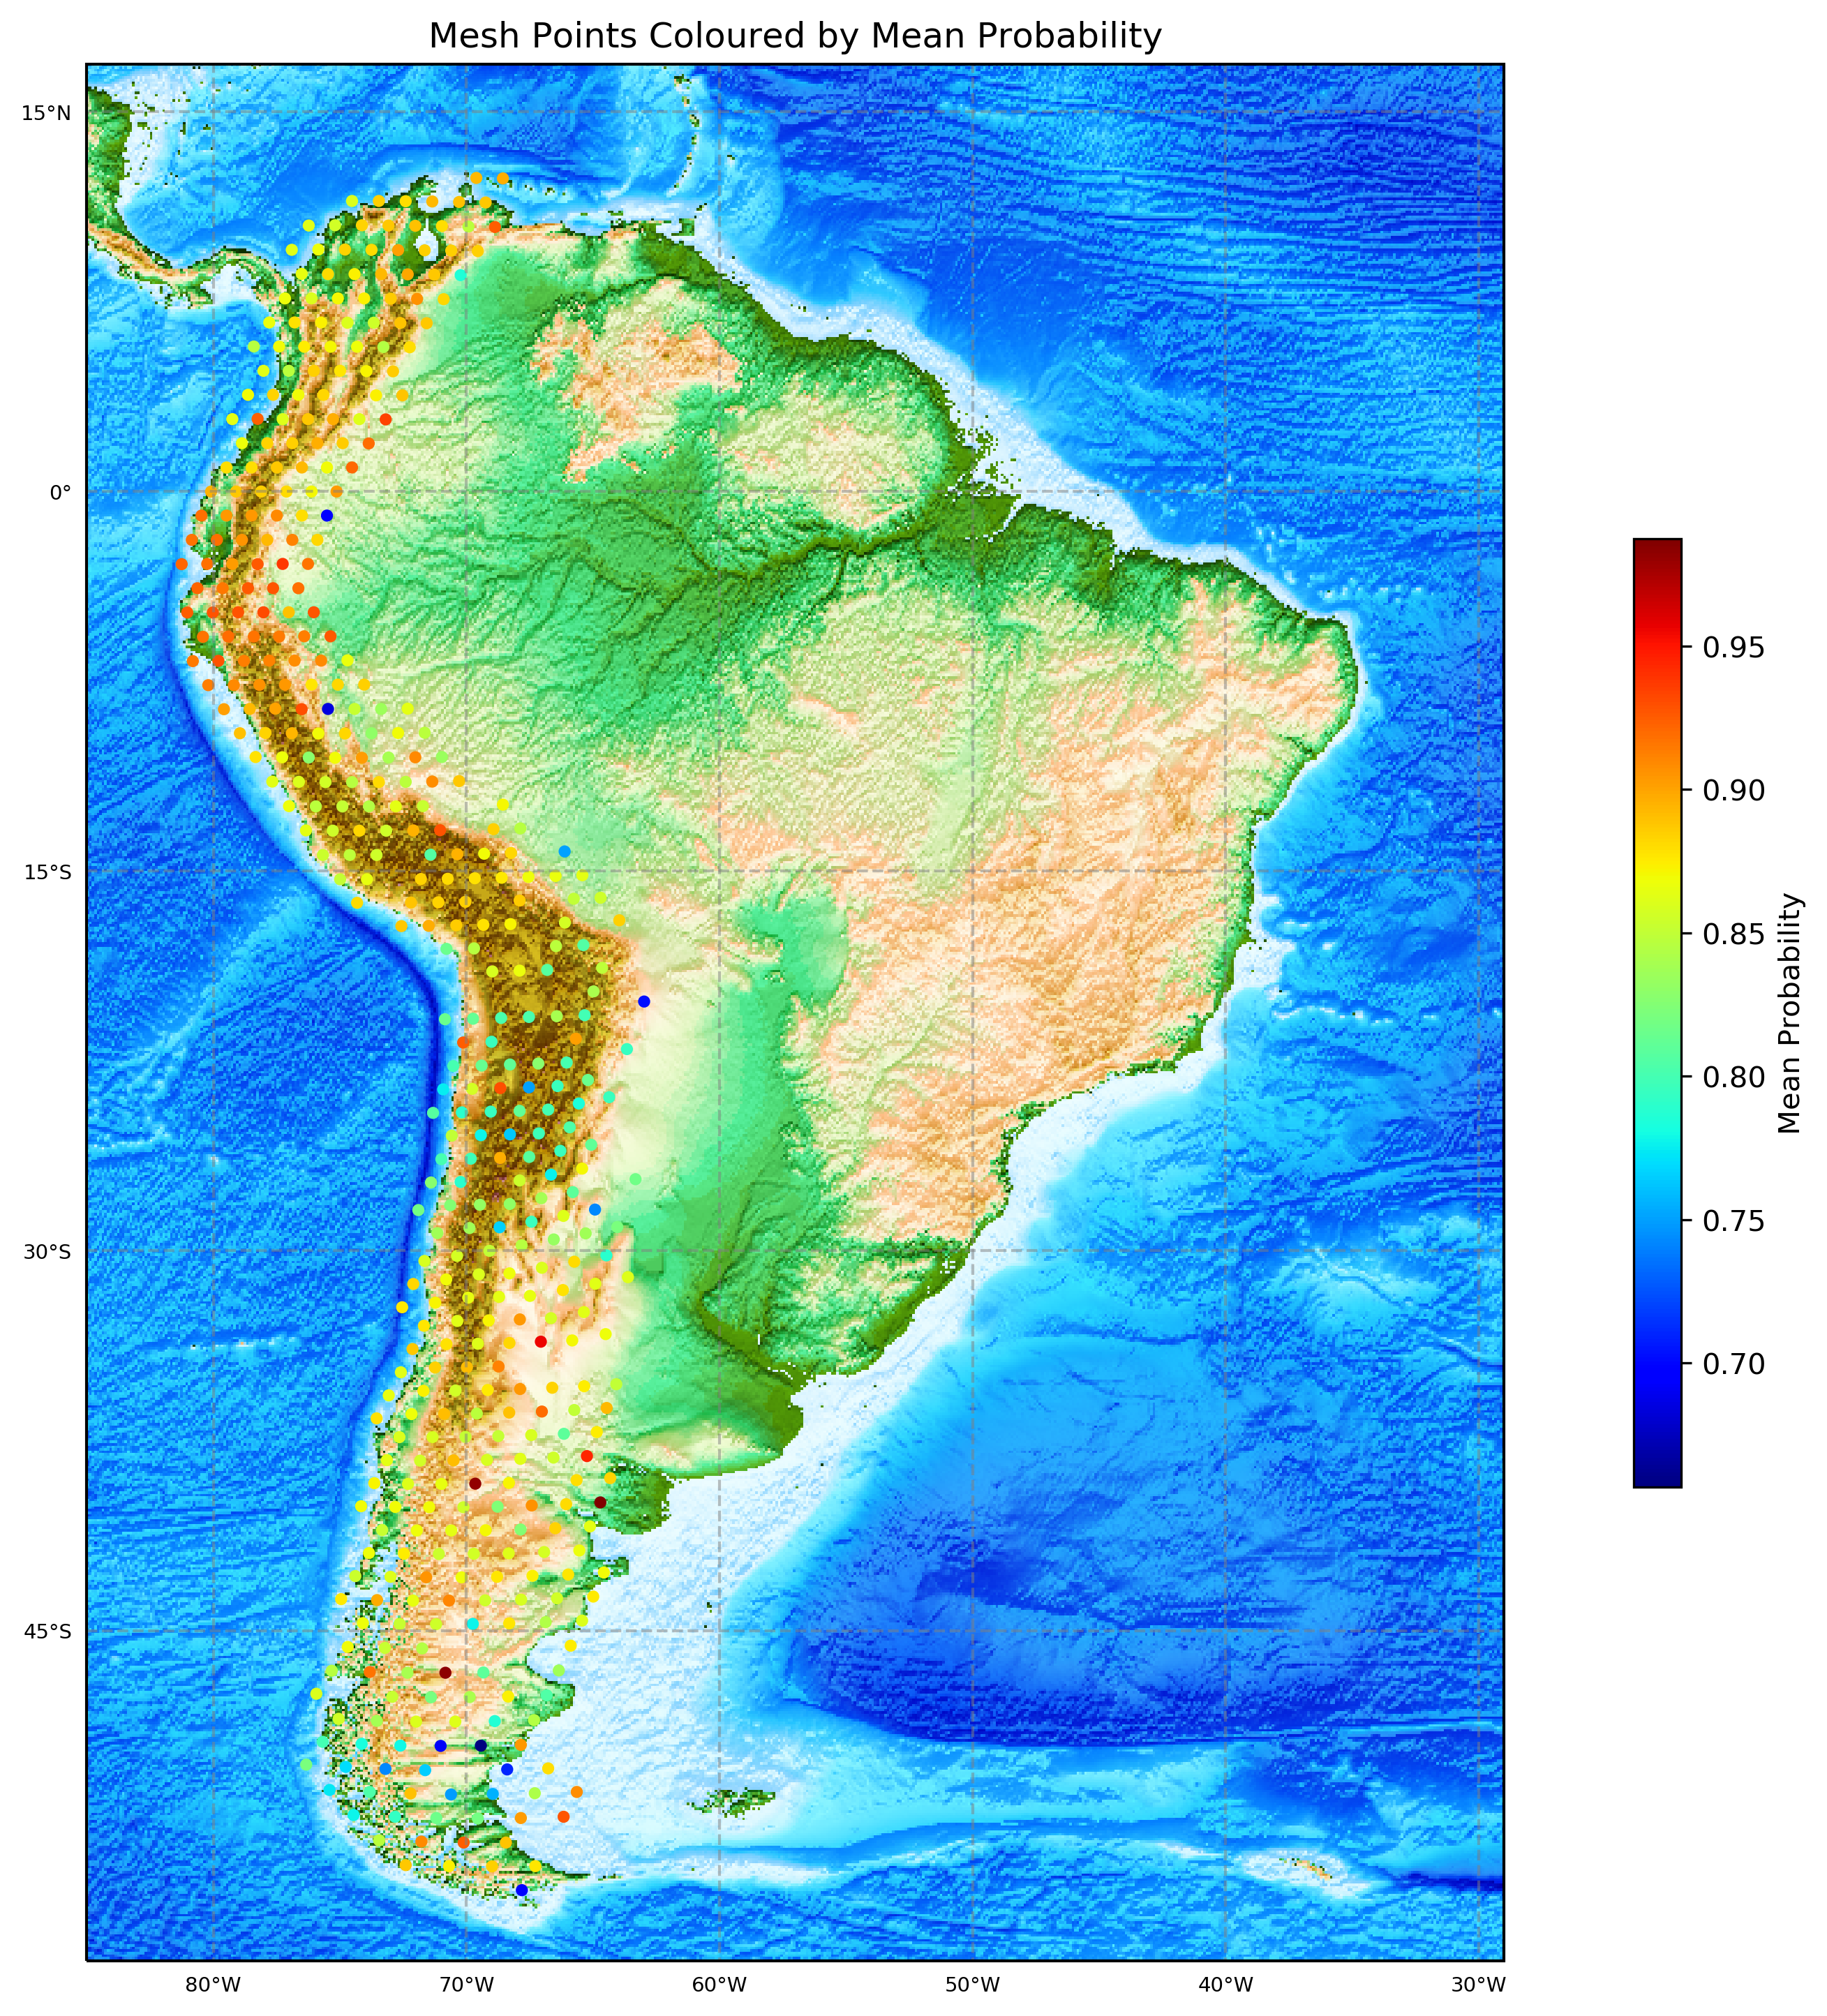

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import TopoMap
import os

ml_output_dir = Utils.get_ml_output_dir()

if not os.path.isdir(ml_output_dir):
    os.mkdir(ml_output_dir)

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].mean()
#candidates_lat_lon.sort_values(ascending=False, inplace=True)
SA_candidates_lat_lon = SA_candidates_lat_lon.reset_index()

SA_lons = SA_candidates_lat_lon['lon']
SA_lats = SA_candidates_lat_lon['lat']

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.stock_img()
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

ax.set_extent([-85, -29, -55, 15])
#ax.set_extent(Utils.get_region_of_interest_extent())
cb = ax.scatter(SA_lons, SA_lats, 40, marker='.',c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

plt.title('Mesh Points Coloured by Mean Probability')
fig.colorbar(cb, shrink=0.5, label='Mean Probability')
plt.savefig(Utils.get_ml_output_dir() + f'mean-Probability.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{ml_output_dir}mean-Probability.png')
plt.show()

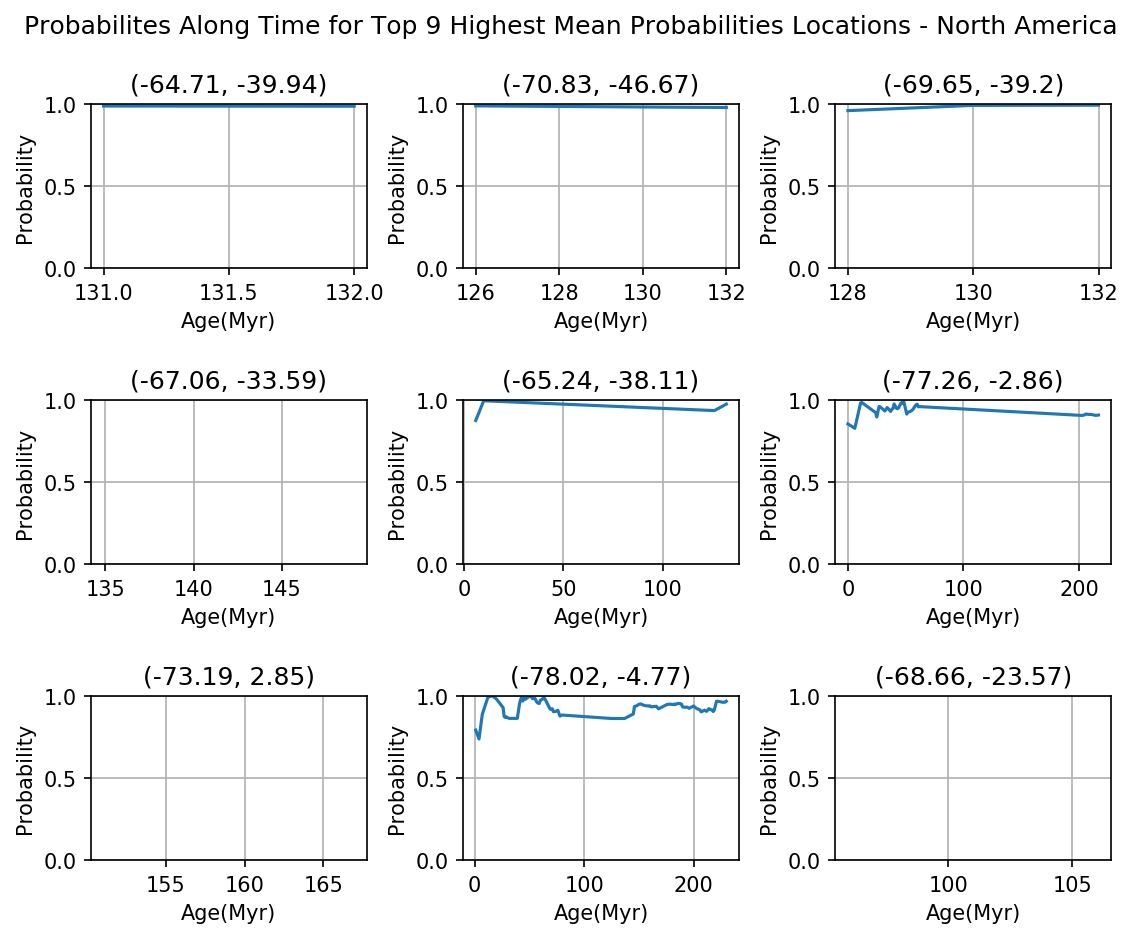

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])

SA_prob_means = SA_candidates_lat_lon['prob'].mean().sort_values(ascending=False)
SA_prob_means = SA_prob_means.head(10)

fig = plt.figure(figsize=(8,6),dpi=150)

for i in range(9):
    plt.subplot(330+i+1)
    tmp = SA_candidates_lat_lon.get_group(SA_prob_means.index[i])
    plt.plot(tmp['age'], tmp['prob'])
    plt.xlabel('Age(Myr)')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.title(f'{SA_prob_means.index[i]}')
    plt.grid(True)
  

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)
plt.suptitle('Probabilites Along Time for Top 9 Highest Mean Probabilities Locations - North America',y=1.02)
plt.show()

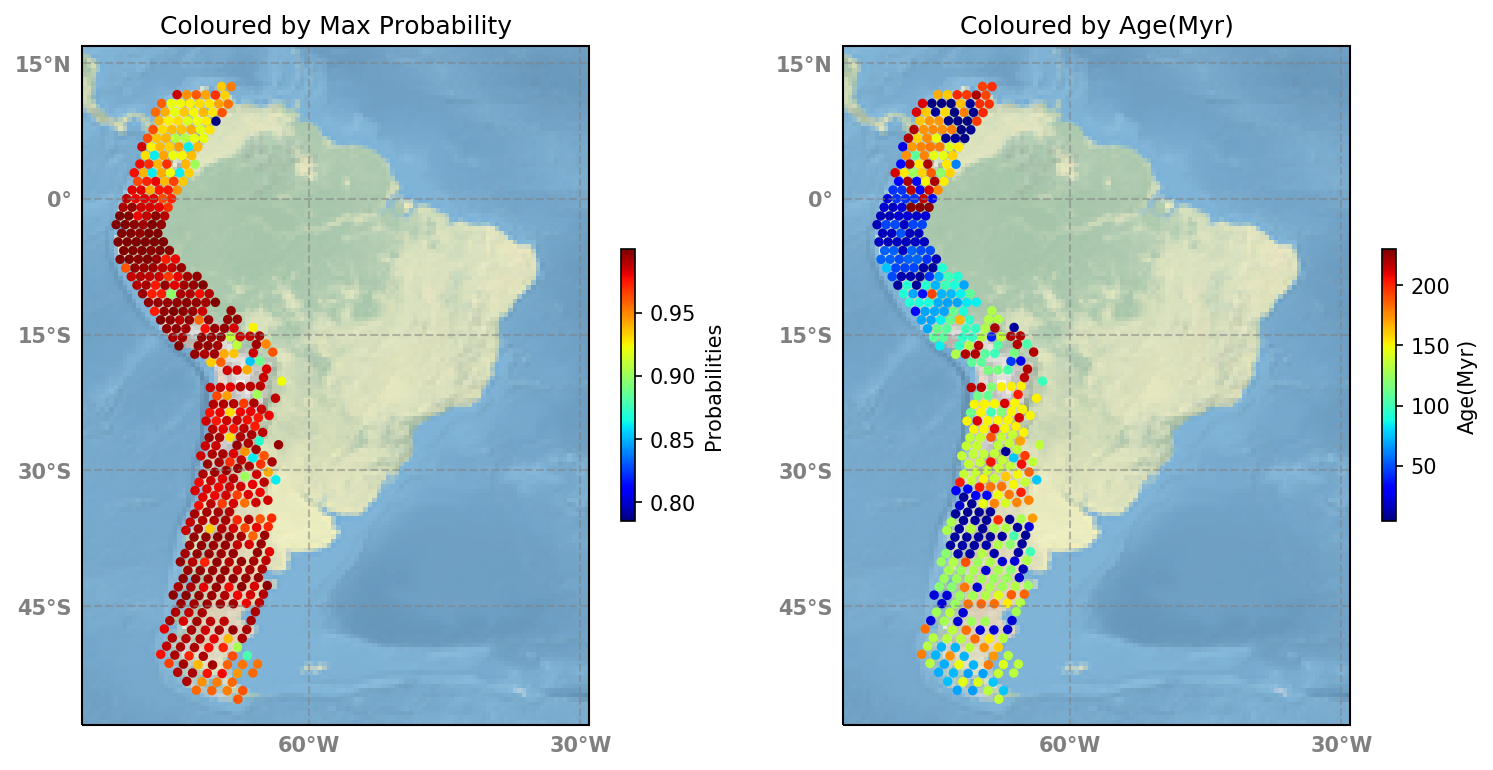

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#display(candidates_lat_lon.sort_values(by=['prob'],ascending=False))
def set_ax(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
    gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

    ax.stock_img()
    ax.set_extent([-85, -29, -55, 15])
    #ax.set_extent(Utils.get_region_of_interest_extent())

#plot the data    
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,12),dpi=150)
set_ax(ax1)
set_ax(ax2)

cb1 = ax1.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)
cb2 = ax2.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['age'], cmap=plt.cm.jet)
ax1.title.set_text('Coloured by Max Probability')
ax2.title.set_text('Coloured by Age(Myr)')
fig.colorbar(cb2, shrink=0.2, label='Age(Myr)', ax=ax2)
fig.colorbar(cb1, shrink=0.2, label='Probabilities', ax=ax1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the map has been saved at ./case_AREPS/ml_output/max-Probability_SA.png


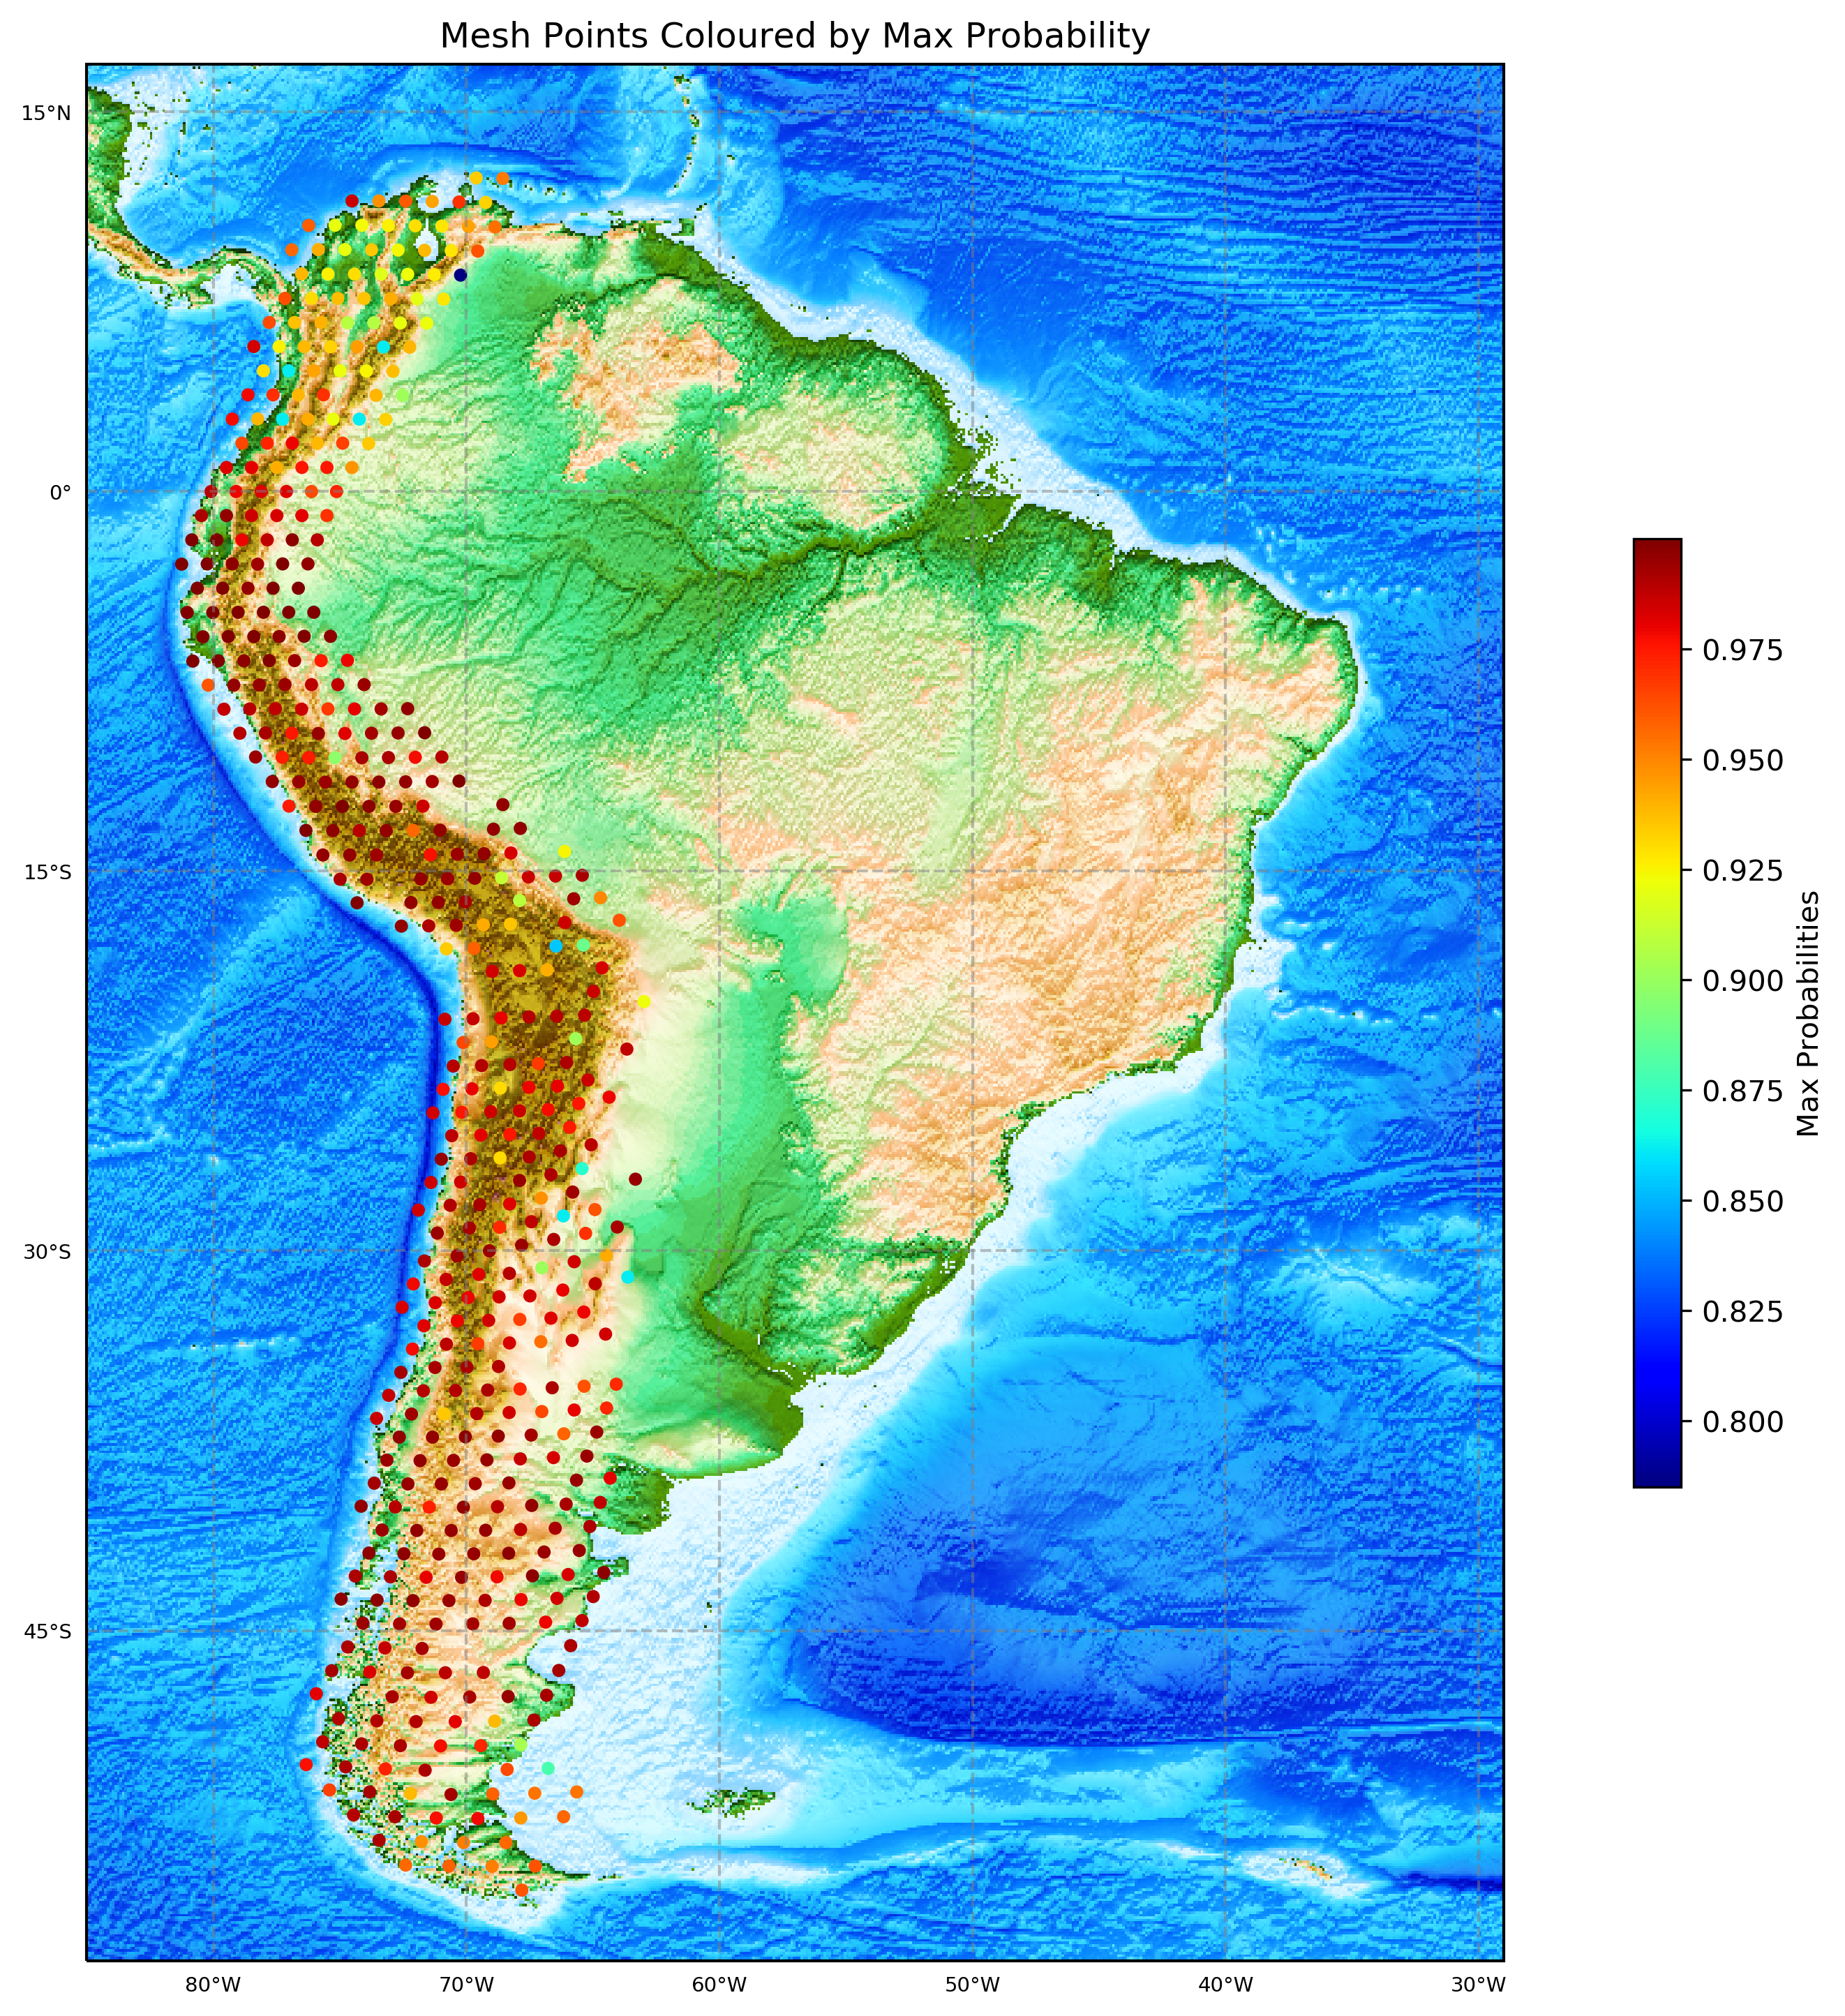

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.set_extent(Utils.get_region_of_interest_extent())
#ax.stock_img()
ax.set_extent([-85, -29, -55, 15])
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

cb = ax.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

ax.title.set_text('Mesh Points Coloured by Max Probability')
fig.colorbar(cb1, shrink=0.5, label='Max Probabilities')
plt.savefig(Utils.get_ml_output_dir() + f'max-Probability_SA.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{Utils.get_ml_output_dir()}max-Probability_SA.png')
plt.show()

In [11]:
#clf = SVC(kernel='rbf', gamma=2, C=100, probability=True)
clf = GaussianProcessClassifier(2.0 * RBF(1.0))
#clf = AdaBoostClassifier(n_estimators=100)

SA_train_data, SA_test_data, SA_train_labels, SA_test_labels = \
train_test_split(SA_data, SA_labels, test_size=0.2, random_state=None)

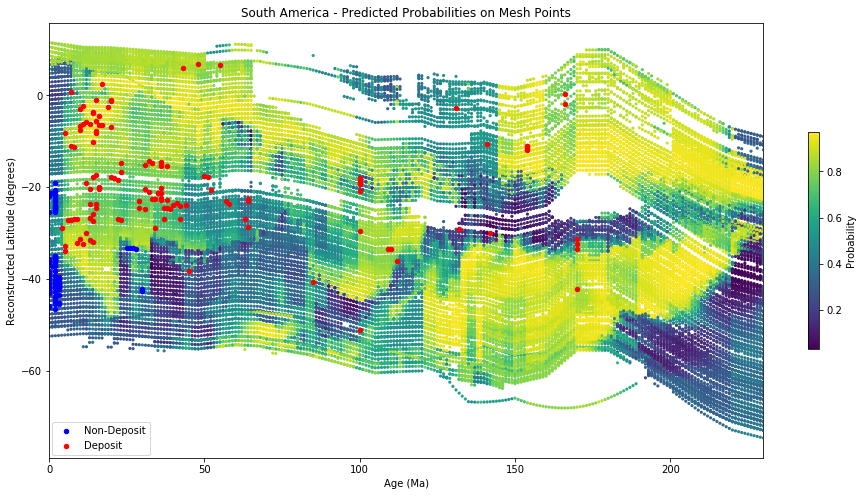

In [12]:
#train the ML model - South America
clf.fit(SA_data, SA_labels)

#read in test data and predict
import pandas as pd
import re
import numpy as np

SA_candidates= pd.read_csv(Utils.get_ml_input_dir() + 'SA_deposit_candidates.csv')
SA_all_candidates_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/deposit_candidates.csv')
SA_all_positive_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/positive_deposits.csv')
SA_all_negative_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/negative_deposits_cleaned.csv')

feature_names = Utils.get_parameter('feature_names')

SA_positive_idx = SA_all_positive_data[feature_names].dropna().index
SA_negative_idx = SA_all_negative_data[feature_names].dropna().index
SA_candidates_idx = SA_all_candidates_data[feature_names].dropna().index

#display(candidates)
#print(all_candidates_data.iloc[positive.index])
SA_test_data = preprocessing.scale(SA_candidates)
SA_mesh_prob=clf.predict_proba(SA_test_data)

#make a plot
fig, ax = plt.subplots(figsize=(16, 8))
p_time = Utils.get_parameter('time')
plt.xlim([0,p_time['end']])
cb = plt.scatter(SA_all_candidates_data.iloc[SA_candidates_idx]['age'],
                 SA_all_candidates_data.iloc[SA_candidates_idx]['recon_lat'], 
#                 s=10,marker='o',edgecolor='none')
                 c=SA_mesh_prob[:,1],s=10,marker='o',edgecolor='none')
#c=mesh_prob[:,1],s=10,marker='o',edgecolor='none')


p1 = plt.scatter(SA_all_positive_data.iloc[SA_positive_idx]['age'], 
                 SA_all_positive_data.iloc[SA_positive_idx]['recon_lat'], 
                 color='red',s=20,marker='o')
p2 = plt.scatter(SA_all_negative_data.iloc[SA_negative_idx]['age'], 
                 SA_all_negative_data.iloc[SA_negative_idx]['recon_lat'],
                 color='blue',s=20,marker='o')

fig.colorbar(cb, shrink=0.5, label='Probability')
plt.title('South America - Predicted Probabilities on Mesh Points')
plt.ylabel('Reconstructed Latitude (degrees)')
plt.xlabel('Age (Ma)')
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=3, borderaxespad=0.3,numpoints=1)

plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import TopoMap
import os

ml_output_dir = Utils.get_ml_output_dir()

if not os.path.isdir(ml_output_dir):
    os.mkdir(ml_output_dir)

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].mean()
#candidates_lat_lon.sort_values(ascending=False, inplace=True)
SA_candidates_lat_lon = SA_candidates_lat_lon.reset_index()

SA_lons = SA_candidates_lat_lon['lon']
SA_lats = SA_candidates_lat_lon['lat']

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.stock_img()
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

ax.set_extent([-85, -29, -55, 15])
#ax.set_extent(Utils.get_region_of_interest_extent())
cb = ax.scatter(SA_lons, SA_lats, 40, marker='.',c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

plt.title('Mesh Points Coloured by Mean Probability')
fig.colorbar(cb, shrink=0.5, label='Mean Probability')
plt.savefig(Utils.get_ml_output_dir() + f'mean-Probability.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{ml_output_dir}mean-Probability.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])

SA_prob_means = SA_candidates_lat_lon['prob'].mean().sort_values(ascending=False)
SA_prob_means = SA_prob_means.head(10)

fig = plt.figure(figsize=(8,6),dpi=150)

for i in range(9):
    plt.subplot(330+i+1)
    tmp = SA_candidates_lat_lon.get_group(SA_prob_means.index[i])
    plt.plot(tmp['age'], tmp['prob'])
    plt.xlabel('Age(Myr)')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.title(f'{SA_prob_means.index[i]}')
    plt.grid(True)
  

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)
plt.suptitle('Probabilites Along Time for Top 9 Highest Mean Probabilities Locations - North America',y=1.02)
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#display(candidates_lat_lon.sort_values(by=['prob'],ascending=False))
def set_ax(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
    gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

    ax.stock_img()
    ax.set_extent([-85, -29, -55, 15])
    #ax.set_extent(Utils.get_region_of_interest_extent())

#plot the data    
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,12),dpi=150)
set_ax(ax1)
set_ax(ax2)

cb1 = ax1.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)
cb2 = ax2.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['age'], cmap=plt.cm.jet)
ax1.title.set_text('Coloured by Max Probability')
ax2.title.set_text('Coloured by Age(Myr)')
fig.colorbar(cb2, shrink=0.2, label='Age(Myr)', ax=ax2)
fig.colorbar(cb1, shrink=0.2, label='Probabilities', ax=ax1)
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.set_extent(Utils.get_region_of_interest_extent())
#ax.stock_img()
ax.set_extent([-85, -29, -55, 15])
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

cb = ax.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

ax.title.set_text('Mesh Points Coloured by Max Probability')
fig.colorbar(cb1, shrink=0.5, label='Max Probabilities')
plt.savefig(Utils.get_ml_output_dir() + f'max-Probability_SA.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{Utils.get_ml_output_dir()}max-Probability_SA.png')
plt.show()

In [ ]:
#clf = SVC(kernel='rbf', gamma=2, C=100, probability=True)
#clf = GaussianProcessClassifier(2.0 * RBF(1.0))
clf = AdaBoostClassifier(n_estimators=100)

SA_train_data, SA_test_data, SA_train_labels, SA_test_labels = \
train_test_split(SA_data, SA_labels, test_size=0.2, random_state=None)

In [ ]:
#train the ML model - South America
clf.fit(SA_data, SA_labels)

#read in test data and predict
import pandas as pd
import re
import numpy as np

SA_candidates= pd.read_csv(Utils.get_ml_input_dir() + 'SA_deposit_candidates.csv')
SA_all_candidates_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/deposit_candidates.csv')
SA_all_positive_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/positive_deposits.csv')
SA_all_negative_data = pd.read_csv('case_AREPS/coreg_output_clean/SA/negative_deposits_cleaned.csv')

feature_names = Utils.get_parameter('feature_names')

SA_positive_idx = SA_all_positive_data[feature_names].dropna().index
SA_negative_idx = SA_all_negative_data[feature_names].dropna().index
SA_candidates_idx = SA_all_candidates_data[feature_names].dropna().index

#display(candidates)
#print(all_candidates_data.iloc[positive.index])
SA_test_data = preprocessing.scale(SA_candidates)
SA_mesh_prob=clf.predict_proba(SA_test_data)

#make a plot
fig, ax = plt.subplots(figsize=(16, 8))
p_time = Utils.get_parameter('time')
plt.xlim([0,p_time['end']])
cb = plt.scatter(SA_all_candidates_data.iloc[SA_candidates_idx]['age'],
                 SA_all_candidates_data.iloc[SA_candidates_idx]['recon_lat'], 
#                 s=10,marker='o',edgecolor='none')
                 c=SA_mesh_prob[:,1],s=10,marker='o',edgecolor='none')
#c=mesh_prob[:,1],s=10,marker='o',edgecolor='none')


p1 = plt.scatter(SA_all_positive_data.iloc[SA_positive_idx]['age'], 
                 SA_all_positive_data.iloc[SA_positive_idx]['recon_lat'], 
                 color='red',s=20,marker='o')
p2 = plt.scatter(SA_all_negative_data.iloc[SA_negative_idx]['age'], 
                 SA_all_negative_data.iloc[SA_negative_idx]['recon_lat'],
                 color='blue',s=20,marker='o')

fig.colorbar(cb, shrink=0.5, label='Probability')
plt.title('South America - Predicted Probabilities on Mesh Points')
plt.ylabel('Reconstructed Latitude (degrees)')
plt.xlabel('Age (Ma)')
ax.legend([p2,p1],["Non-Deposit","Deposit"],
            loc=3, borderaxespad=0.3,numpoints=1)

plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
import TopoMap
import os

ml_output_dir = Utils.get_ml_output_dir()

if not os.path.isdir(ml_output_dir):
    os.mkdir(ml_output_dir)

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].mean()
#candidates_lat_lon.sort_values(ascending=False, inplace=True)
SA_candidates_lat_lon = SA_candidates_lat_lon.reset_index()

SA_lons = SA_candidates_lat_lon['lon']
SA_lats = SA_candidates_lat_lon['lat']

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.stock_img()
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

ax.set_extent([-85, -29, -55, 15])
#ax.set_extent(Utils.get_region_of_interest_extent())
cb = ax.scatter(SA_lons, SA_lats, 40, marker='.',c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

plt.title('Mesh Points Coloured by Mean Probability')
fig.colorbar(cb, shrink=0.5, label='Mean Probability')
plt.savefig(Utils.get_ml_output_dir() + f'mean-Probability.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{ml_output_dir}mean-Probability.png')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_candidates_lat_lon = SA_candidates_lat_lon.groupby(['lon','lat'])

SA_prob_means = SA_candidates_lat_lon['prob'].mean().sort_values(ascending=False)
SA_prob_means = SA_prob_means.head(10)

fig = plt.figure(figsize=(8,6),dpi=150)

for i in range(9):
    plt.subplot(330+i+1)
    tmp = SA_candidates_lat_lon.get_group(SA_prob_means.index[i])
    plt.plot(tmp['age'], tmp['prob'])
    plt.xlabel('Age(Myr)')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.title(f'{SA_prob_means.index[i]}')
    plt.grid(True)
  

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8,
                    wspace=0.35)
plt.suptitle('Probabilites Along Time for Top 9 Highest Mean Probabilities Locations - North America',y=1.02)
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#display(candidates_lat_lon.sort_values(by=['prob'],ascending=False))
def set_ax(ax):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
    gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
    gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

    ax.stock_img()
    ax.set_extent([-85, -29, -55, 15])
    #ax.set_extent(Utils.get_region_of_interest_extent())

#plot the data    
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(12,12),dpi=150)
set_ax(ax1)
set_ax(ax2)

cb1 = ax1.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)
cb2 = ax2.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['age'], cmap=plt.cm.jet)
ax1.title.set_text('Coloured by Max Probability')
ax2.title.set_text('Coloured by Age(Myr)')
fig.colorbar(cb2, shrink=0.2, label='Age(Myr)', ax=ax2)
fig.colorbar(cb1, shrink=0.2, label='Probabilities', ax=ax1)
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

SA_candidates_lat_lon = SA_all_candidates_data.iloc[SA_candidates_idx][['lon','lat', 'age']]
SA_candidates_lat_lon['prob'] = SA_mesh_prob[:,1]
SA_idx = SA_candidates_lat_lon.groupby(['lon','lat'])['prob'].transform(max) == SA_candidates_lat_lon['prob']
SA_candidates_lat_lon = SA_candidates_lat_lon[SA_idx]

#plot the data    
fig = plt.figure(figsize=(16,12),dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(range(-180,180,10))
gl.ylocator = mticker.FixedLocator(range(-90,90,15))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 7}
gl.ylabel_style = {'size': 7}

#ax.set_extent(Utils.get_region_of_interest_extent())
#ax.stock_img()
ax.set_extent([-85, -29, -55, 15])
img = Dataset(Utils.get_parameter('topo_grid'))
rgb = TopoMap.get_rgb(np.asarray(img.variables['z']))
ax.imshow(rgb, origin='lower', transform=ccrs.PlateCarree(),
      extent=[-180, 180, -90, 90])

cb = ax.scatter(SA_candidates_lat_lon['lon'], SA_candidates_lat_lon['lat'], 50, marker='.', 
                  c=SA_candidates_lat_lon['prob'], cmap=plt.cm.jet)

ax.title.set_text('Mesh Points Coloured by Max Probability')
fig.colorbar(cb1, shrink=0.5, label='Max Probabilities')
plt.savefig(Utils.get_ml_output_dir() + f'max-Probability_SA.png',bbox_inches='tight',pad_inches=0.2)
print(f'the map has been saved at ./{Utils.get_ml_output_dir()}max-Probability_SA.png')
plt.show()